In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling, this might not be needed, features for this dataset are standardizdd by default
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [8]:
# light EDA , just to see the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Progression'] = y

In [13]:
df.shape # 10 features and 1 target, 442 samples

(442, 11)

In [9]:
df.head() 
# the features are standardized by default, so for each features the mean is 0 and the standard deviation is 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


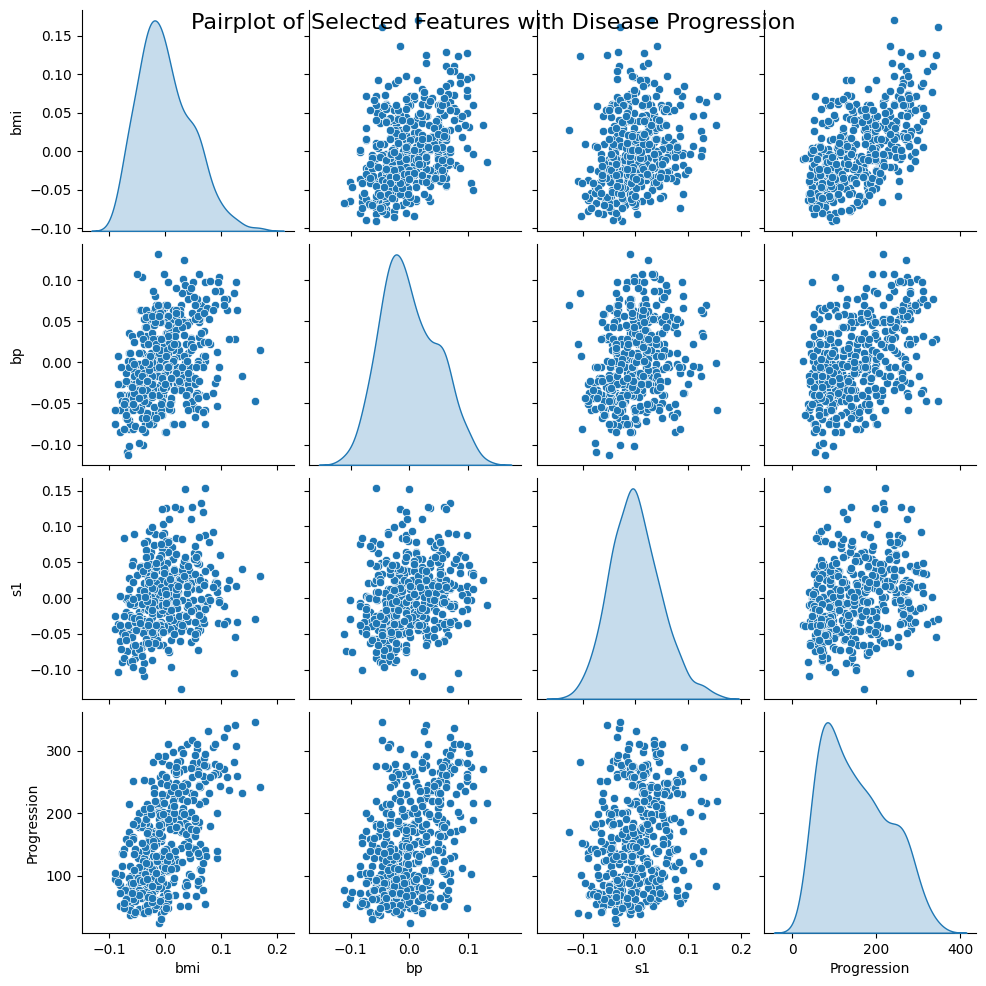

In [10]:

sns.pairplot(df[['bmi', 'bp', 's1', 'Progression']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features with Disease Progression', size=16)
plt.show()


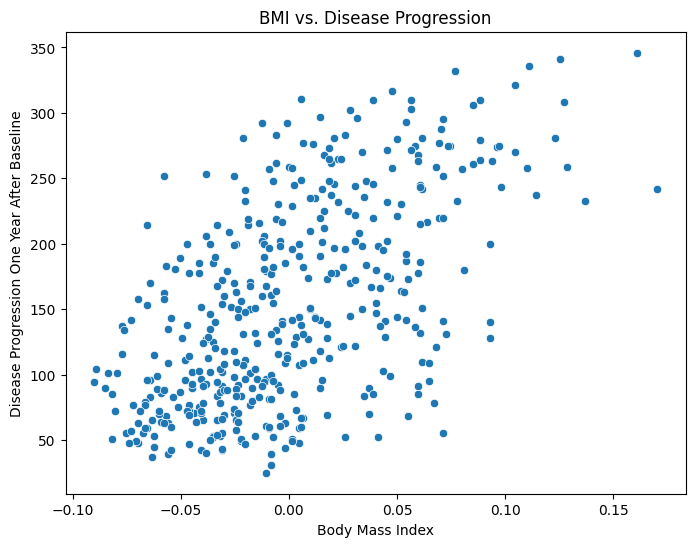

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='Progression', data=df)
plt.title('BMI vs. Disease Progression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression One Year After Baseline')
plt.show()


In [15]:
def vectorized_euclidean_distance(x, X_train): # we can use Manhattan distance depending on the problem
    
    diff = X_train - x.reshape(1, -1)
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [16]:
class KNNRegressor:
    def __init__(self, k = 5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = vectorized_euclidean_distance(x, self.X_train)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return np.mean(k_nearest_labels)

In [20]:
knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred = knn_reg.predict(X_test_scaled)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 3047.449887640449


In [23]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 55.203712625515045


In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 42.777528089887646


In [24]:
from sklearn.metrics import r2_score # (Coefficient of Determination) r2_squared
#  Higher values (closer to 1) generally indicate a better fit, currently this has a score of 0.42

r2 = r2_score(y_test, y_pred)
print(f'R-squared (Coefficient of Determination): {r2}')


R-squared (Coefficient of Determination): 0.42480887066066253


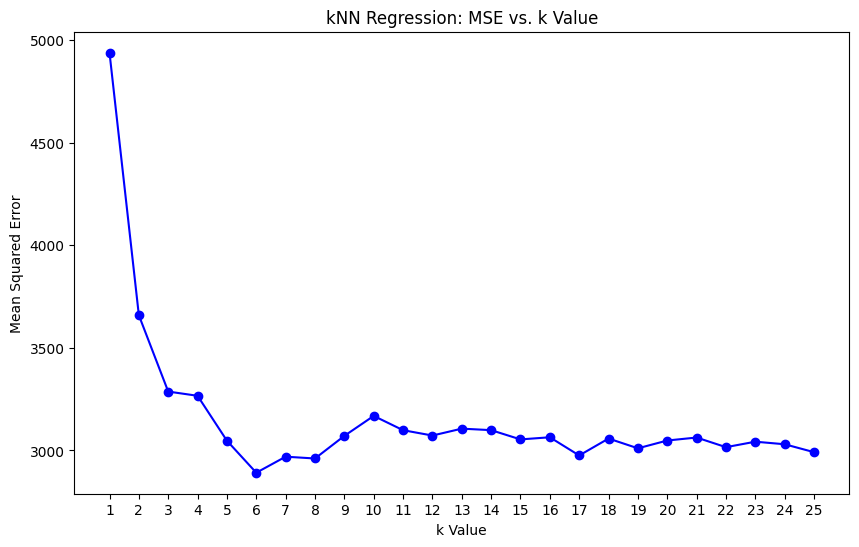

In [26]:
# lets try different k values and see how it affects the model
# Range of k values to try
k_values = range(1, 26)
# Store MSE for each k
mse_scores = []

for k in k_values:
    knn_reg = KNNRegressor(k=k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='b')
plt.title('kNN Regression: MSE vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.show() # best k value is at 6

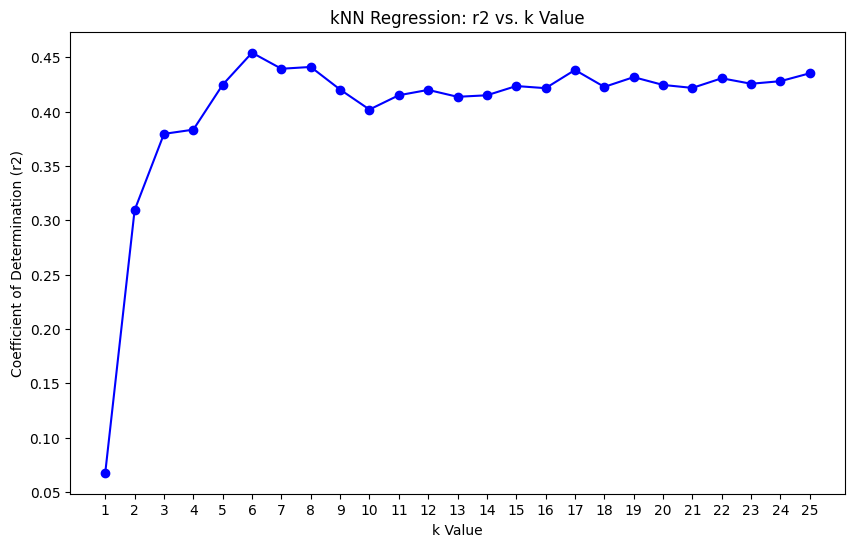

In [27]:
# Range of k values to try
k_values = range(1, 26)
# Store MSE for each k
r2_scores = []

for k in k_values:
    knn_reg = KNNRegressor(k=k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('kNN Regression: r2 vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Coefficient of Determination (r2)')
plt.xticks(k_values)
plt.show() # best k value is at 6

In [28]:
df_test = pd.DataFrame(X_test, columns=diabetes.feature_names)

df_test['y_actual'] = y_test
df_test['y_pred'] = y_pred

print(df_test.head()) # it is a bit off, need to improve the model

        age       sex       bmi        bp        s1        s2        s3  \
0  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   
1  0.092564 -0.044642  0.036907  0.021872 -0.024960 -0.016658  0.000779   
2  0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
3  0.096197 -0.044642  0.051996  0.079265  0.054845  0.036577 -0.076536   
4  0.012648  0.050680 -0.020218 -0.002228  0.038334  0.053174 -0.006584   

         s4        s5        s6  y_actual  y_pred  
0  0.034309  0.032432 -0.005220     219.0  152.76  
1 -0.039493 -0.022517 -0.021788      70.0  154.44  
2 -0.002592  0.084492 -0.017646     202.0  164.44  
3  0.141322  0.098648  0.061054     230.0  233.12  
4  0.034309 -0.005142 -0.009362     111.0  155.16  
